<a href="https://colab.research.google.com/github/neuroidss/EEG-GAN-audio-video/blob/main/transfer_learning_StyleGAN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#StyleGAN3

This Colab is to tryout StyleGAN3 (aka Alias-Free GAN) released in [this repo](https://github.com/NVlabs/stylegan3) by NVidia. Colab produced by [crimeacs](https://twitter.com/EarthML1). Also check out my [telegram channel](https://t.me/nn_for_science) about Deep Learning for Science.

In [1]:
!pip install psutil

In [2]:
!pip install tensorboard

In [3]:
#@title Install dependencies
#from IPython.display import clear_output

#!git clone https://github.com/NVlabs/stylegan3.git
#%cd stylegan3
#!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
#!chmod +x mini.sh
#!bash ./mini.sh -b -f -p /usr/local
#!conda install -q -y --prefix /usr/local jupyter
#!python -m ipykernel install --name "py38" --user
!pip install click 
!pip install numpy 
!pip install pillow 
!pip install torch 
!pip install scipy 
!pip install Ninja 
!pip install imageio 
!pip install imageio-ffmpeg 
#clear_output()

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import os
if os.path.isdir("/content/drive/MyDrive/nvlabs"):
    %cd "/content/drive/MyDrive/nvlabs/stylegan3"
else:
    #install script
    %cd "/content/drive/MyDrive/"
    !mkdir nvlabs
    %cd nvlabs
    !git clone https://github.com/nvlabs/stylegan3.git
#    !git clone --branch tpu https://github.com/shawwn/stylegan2.git
#    !git clone https://github.com/dvschultz/stylegan2-ada
    %cd stylegan3
    !mkdir downloads
    !mkdir datasets

/content/drive/MyDrive/nvlabs/stylegan3


In [5]:
%rmdir /content/dataset-creation
%mkdir /content/dataset-creation
#%mkdir /content/dataset-creation/sq-512
!unzip -j -o -q /content/drive/MyDrive/sq-512.zip -d /content/dataset-creation/sq-512

rmdir: failed to remove '/content/dataset-creation': No such file or directory


In [7]:
#%cd /content/stylegan3

/content/stylegan3


In [11]:
unconverted_dataset = '/content/dataset-creation'
out_path = '/content/drive/MyDrive/datasets-stylegan3/sq-512'
%mkdir /content/drive/MyDrive/datasets-stylegan3
dataset_size = 512 # one of the following 256, 512, 1024
!python dataset_tool.py --source {unconverted_dataset} --dest {out_path} --resolution {dataset_size}x{dataset_size}

100% 6037/6037 [04:16<00:00, 23.56it/s]


In [7]:
baselink ='https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/'
model = "stylegan3-r-afhqv2-512x512.pkl" #@param ["stylegan3-r-afhqv2-512x512.pkl", "stylegan3-r-ffhq-1024x1024.pkl", "stylegan3-r-ffhqu-1024x1024.pkl","stylegan3-r-ffhqu-256x256.pkl","stylegan3-r-metfaces-1024x1024.pkl","stylegan3-r-metfacesu-1024x1024.pkl","stylegan3-t-afhqv2-512x512.pkl","stylegan3-t-ffhq-1024x1024.pkl","stylegan3-t-ffhqu-1024x1024.pkl","stylegan3-t-ffhqu-256x256.pkl","stylegan3-t-metfaces-1024x1024.pkl","stylegan3-t-metfacesu-1024x1024.pkl"]



--2021-10-12 06:35:11--  https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl
Resolving api.ngc.nvidia.com (api.ngc.nvidia.com)... 54.193.0.205, 54.219.145.142
Connecting to api.ngc.nvidia.com (api.ngc.nvidia.com)|54.193.0.205|:443... connected.
HTTP request sent, awaiting response... 302 
Location: https://prod-model-registry-ngc-bucket.s3.us-west-2.amazonaws.com/org/nvidia/team/research/models/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl?response-content-disposition=attachment%3B%20filename%3D%22stylegan3-r-afhqv2-512x512.pkl%22&response-content-type=application%2Foctet-stream&X-Amz-Security-Token=IQoJb3JpZ2luX2VjEIX%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLXdlc3QtMSJGMEQCIAjU0QKJJtak1xH1AIcSblhMyRPuxDu7GrTxVucpbqvTAiA5KznYTpem0NbVGl7BjgrBgo1Y5r7CaPfYRGWovPzlGCqDBAj%2B%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAMaDDc4OTM2MzEzNTAyNyIMlBi%2BYTzwdCA5ybJBKtcDWTTh94IVBpNHDSUsQTpLcBwCqwSf1XjzArgxevIRzEl2W7z6IyZ%2Fs%2Fe2Z8CxfvTjcCrwEQ

In [ ]:
!wget {baselink}{model}

In [8]:
model_size = 512
dataset_location = '/content/drive/MyDrive/datasets-stylegan3/sq-512'
#resume = 'rosinality-ffhq-800k'
#resume = 'pretrained/000000020-kimg-sq-256-checkpoint.pt'
#resume = 'results/training-000009/000000011-kimg-sq-512-checkpoint.pt'
#resume = 'results/training-000011/000000022-kimg-sq-512-checkpoint.pt'
#resume = 'results/training-000031/000000218-kimg-sq-256-checkpoint.pt'
resume=model
#batch_size = 4
batch_size = 8
augmentations = True # ada

sample_frequency = 1 # in kimgs or thousands of images
checkpoint_frequency = 1 # in kimgs or thousands of images

In [ ]:
!python train.py \
--outdir=/content/drive/MyDrive/training-runs \
--cfg=stylegan3-r \
--data={dataset_location} \
--gpus=1 \
--batch=4 \
--gamma=6.6 \
--mirror=1 \
--kimg=5000 \
--snap=1 \
--resume={resume} \
--metrics=none \
--workers=2 \
--tick=1




Training options:
{
  "G_kwargs": {
    "class_name": "training.networks_stylegan3.Generator",
    "z_dim": 512,
    "w_dim": 512,
    "mapping_kwargs": {
      "num_layers": 2
    },
    "channel_base": 65536,
    "channel_max": 1024,
    "magnitude_ema_beta": 0.9998613801725043,
    "conv_kernel": 1,
    "use_radial_filters": true
  },
  "D_kwargs": {
    "class_name": "training.networks_stylegan2.Discriminator",
    "block_kwargs": {
      "freeze_layers": 0
    },
    "mapping_kwargs": {},
    "epilogue_kwargs": {
      "mbstd_group_size": 4
    },
    "channel_base": 32768,
    "channel_max": 512
  },
  "G_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.0025
  },
  "D_opt_kwargs": {
    "class_name": "torch.optim.Adam",
    "betas": [
      0,
      0.99
    ],
    "eps": 1e-08,
    "lr": 0.002
  },
  "loss_kwargs": {
    "class_name": "training.loss.StyleGAN2Loss",
    "r1_gamma": 6.6,
    "blur_init_si

In [1]:
#@title Install dependencies
from IPython.display import clear_output

!git clone https://github.com/NVlabs/stylegan3.git
%cd stylegan3
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-py38_4.8.2-Linux-x86_64.sh
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local
!conda install -q -y --prefix /usr/local jupyter
!python -m ipykernel install --name "py38" --user
!pip install click -q
!pip install numpy -q
!pip install pillow -q
!pip install torch -q
!pip install scipy -q
!pip install Ninja -q
!pip install imageio -q
!pip install imageio-ffmpeg -q
clear_output()


Loading networks from "https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-metfacesu-1024x1024.pkl"...
Generating image for seed 4083 (0/1) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "filtered_lrelu_plugin"... Done.


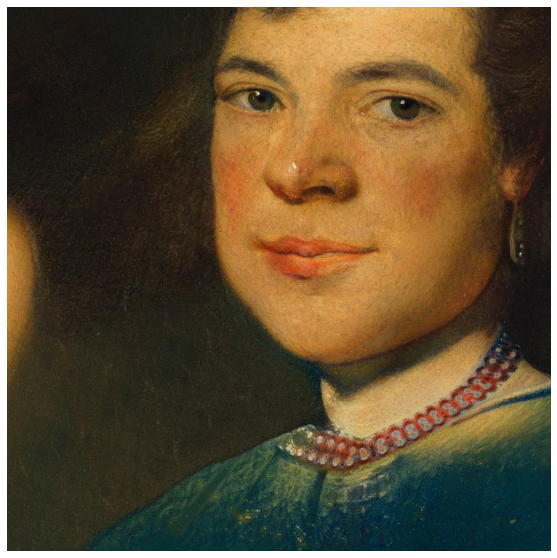

In [2]:
#@title Generate an image
#@markdown StyleGAN3 pre-trained models for config T (translation equiv.) and config R (translation and rotation equiv.)
seed = 4083 #@param {type:"slider", min:0, max:9999, step:1}

baselink ='https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/'
model = "stylegan3-r-afhqv2-512x512.pkl" #@param ["stylegan3-r-afhqv2-512x512.pkl", "stylegan3-r-ffhq-1024x1024.pkl", "stylegan3-r-ffhqu-1024x1024.pkl","stylegan3-r-ffhqu-256x256.pkl","stylegan3-r-metfaces-1024x1024.pkl","stylegan3-r-metfacesu-1024x1024.pkl","stylegan3-t-afhqv2-512x512.pkl","stylegan3-t-ffhq-1024x1024.pkl","stylegan3-t-ffhqu-1024x1024.pkl","stylegan3-t-ffhqu-256x256.pkl","stylegan3-t-metfaces-1024x1024.pkl","stylegan3-t-metfacesu-1024x1024.pkl"]

# Generate an image using pre-trained AFHQv2 model ("Ours" in Figure 1, left).
!python gen_images.py --outdir=out --trunc=1 \
 --seeds=$seed --network=$baselink$model
 
import matplotlib.pyplot as plt
from PIL import Image

plt.figure(figsize=(10,10))
img = Image.open('/content/stylegan3/out/seed%04d.png' % seed);
plt.imshow(img);
plt.axis('off');

In [3]:
#@title Generate an interpolation video
#@markdown The more steps in seeds - the longer the interpolatttion and hence rendering (recommended to use +30)
%cd /content/stylegan3

seed = 42 #@param {type:"number"}
n_rows = 1 #@param {type:"number"}
n_cols = 1 #@param {type:"number"}
num_keyframes = 2 #@param {type:"number"}

assert stop_seed > start_seed, 'Stop_seed should be larger then start_seed'
baselink ='https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/'
model = "stylegan3-r-ffhq-1024x1024.pkl" #@param ["stylegan3-r-afhqv2-512x512.pkl", "stylegan3-r-ffhq-1024x1024.pkl", "stylegan3-r-ffhqu-1024x1024.pkl","stylegan3-r-ffhqu-256x256.pkl","stylegan3-r-metfaces-1024x1024.pkl","stylegan3-r-metfacesu-1024x1024.pkl","stylegan3-t-afhqv2-512x512.pkl","stylegan3-t-ffhq-1024x1024.pkl","stylegan3-t-ffhqu-1024x1024.pkl","stylegan3-t-ffhqu-256x256.pkl","stylegan3-t-metfaces-1024x1024.pkl","stylegan3-t-metfacesu-1024x1024.pkl"]

# Render a  grid of interpolations for seeds N through K.
!python gen_video.py --output=lerp.mp4 --trunc=1 --shuffle-seed=$seed --grid={n_rows}x{n_cols} \
    --network=$baselink$model --num-keyframes=$num_keyframes

from IPython.display import HTML
from base64 import b64encode
mp4 = open('lerp.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

/content/stylegan3


NameError: ignored

In [ ]:
!python gen_video.py --help

Usage: gen_video.py [OPTIONS]

  Render a latent vector interpolation video.

  Examples:

  # Render a 4x2 grid of interpolations for seeds 0 through 31.
  python gen_video.py --output=lerp.mp4 --trunc=1 --seeds=0-31 --grid=4x2 \
      --network=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-afhqv2-512x512.pkl

  Animation length and seed keyframes:

  The animation length is either determined based
  on the --seeds value or explicitly specified
  using the --num-keyframes option.

  When num keyframes is specified with --num-
  keyframes, the output video length will be
  'num_keyframes*w_frames' frames.

  If --num-keyframes is not specified, the number
  of seeds given with --seeds must be divisible by
  grid size W*H (--grid).  In this case the output
  video length will be '# seeds/(w*h)*w_frames'
  frames.

Options:
  --network TEXT           Network pickle filename
                           [required]
  --seeds PARSE_RANGE      List

In [9]:
!python dataset_tool.py --help

Usage: dataset_tool.py [OPTIONS]

  Convert an image dataset into a dataset archive
  usable with StyleGAN2 ADA PyTorch.

  The input dataset format is guessed from the
  --source argument:

  --source *_lmdb/                    Load LSUN dataset
  --source cifar-10-python.tar.gz     Load CIFAR-10 dataset
  --source train-images-idx3-ubyte.gz Load MNIST dataset
  --source path/                      Recursively load all images from path/
  --source dataset.zip                Recursively load all images from dataset.zip

  Specifying the output format and path:

  --dest /path/to/dir                 Save output files under /path/to/dir
  --dest /path/to/dataset.zip         Save output files into /path/to/dataset.zip

  The output dataset format can be either an image
  folder or an uncompressed zip archive. Zip
  archives makes it easier to move datasets around
  file servers and clusters, and may offer better
  training performance on network file systems.

  Images within the dataset a

In [15]:
!python train.py --help

Usage: train.py [OPTIONS]

  Train a GAN using the techniques described in
  the paper "Alias-Free Generative Adversarial
  Networks".

  Examples:

  # Train StyleGAN3-T for AFHQv2 using 8 GPUs.
  python train.py --outdir=~/training-runs --cfg=stylegan3-t --data=~/datasets/afhqv2-512x512.zip \
      --gpus=8 --batch=32 --gamma=8.2 --mirror=1

  # Fine-tune StyleGAN3-R for MetFaces-U using 1 GPU, starting from the pre-trained FFHQ-U pickle.
  python train.py --outdir=~/training-runs --cfg=stylegan3-r --data=~/datasets/metfacesu-1024x1024.zip \
      --gpus=8 --batch=32 --gamma=6.6 --mirror=1 --kimg=5000 --snap=5 \
      --resume=https://api.ngc.nvidia.com/v2/models/nvidia/research/stylegan3/versions/1/files/stylegan3-r-ffhqu-1024x1024.pkl

  # Train StyleGAN2 for FFHQ at 1024x1024 resolution using 8 GPUs.
  python train.py --outdir=~/training-runs --cfg=stylegan2 --data=~/datasets/ffhq-1024x1024.zip \
      --gpus=8 --batch=32 --gamma=10 --mirror=1 --aug=noaug

Options:
  --outdir DIR 